



##Breast cancer analysis and classifying the tumor types using machine learning algorithms


__________________________

## Introduction

Breast Cancer is one of the most frequent diseases and the top cause of mortality for most people around the world. Although many people who have breast cancer have no family history, women who have blood relatives who have had the disease are more likely to get it. In addition, other factors such as aging, genes, dense breast tissues, obesity, and radiation exposure all increase the chance of breast cancer. Therefore, early detection of breast cancer improves the chances of survival by allowing patients to receive timely clinical treatment. Machine learning (ML) is widely regarded as the approach of choice in breast cancer pattern classification and forecast modeling due to its unique benefits in detecting essential characteristics from complex disease datasets.











##Objective

The goal of this study is to evaluate and analyze the dataset to forecast and classify the tumor types regarding several measured features.There are two diagnoses for tissue: malignant and benign. For different cancer types, it is necessary to determine the correct diagnosis of tissue as every membranes have different treatments. To achieve the goal of the study, logistic regression, KNN, SVM, and Random forest algorithms will be used for the given dataset. 

# Data Visual Analysis

##importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import datetime
import seaborn as sns


##Importing and data evaluation

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [ ]:

# Evaluate the number of null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.drop(['Unnamed: 32','id'],axis = 1)

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**All parameters may be useful to classify cancer; if these parameters have relatively large values, it can be a sign of malignant tissue.** 

###Following provide the discription for the variables:
#####**id:** number that is used for identification
#####**diagnosis:** diagnosis of membranes, of which there are two diagnoses for tissue: malignant and benign. 
#### **radius means:** show a distance from the center to a point on the perimeter. 
#### **Radius se:** estimated standard error. 
#### **Radius worst**: the highest value of the center for the estimated range. 
#### **Texture:** the standard deviation of the gray-scale values.
#### **Texture se:** the standard error of the calculated standard deviation for gray-scale values
#### **texture worst:** highest mean value of standard deviation for gray-scale values
#### **Perimeter:** the mean value for the core tumor
#### **perimeter se:** standard error of the mean represents the core tumor 
#### **perimeter worst column:** highest value of the core tumor 
#### **Area mean, Area se, and Area worst:** represent values related to the mean of the cancer cell areas
#### **Smoothness:** mean for regional variations in radius range
#### **smoothness se:**standard error of the mean of local variations in radius length
#### **smoothness worst:** the largest mean value 
#### **Compactness mean:** value of estimation of the perimeter and area
#### **compactness se:** standard error of compactness mean
#### **compactness worst:** the highest mean value of the calculation
#### **Concavity mean:** severity of concave portions of the shape
#### **concave points:** the number of concave portions of the contour
#### **Concavity se:** standard error of concave portions
#### **concave points se:** standard error of the concave portions of the shape. 
#### **concavity worst:** the highest mean value 
#### **fractal dimension:** calculated mean value for coastline approximation
#### **fractal dimension se**: standard error of the coastline approximation
#### **fractal dimension worst:** the highest mean value of the coastline approximation 

In [ ]:

df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

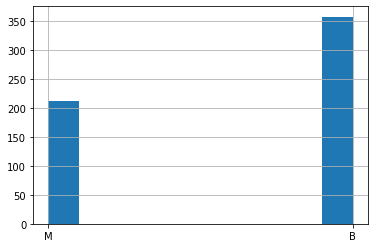

In [ ]:
df["diagnosis"].hist()


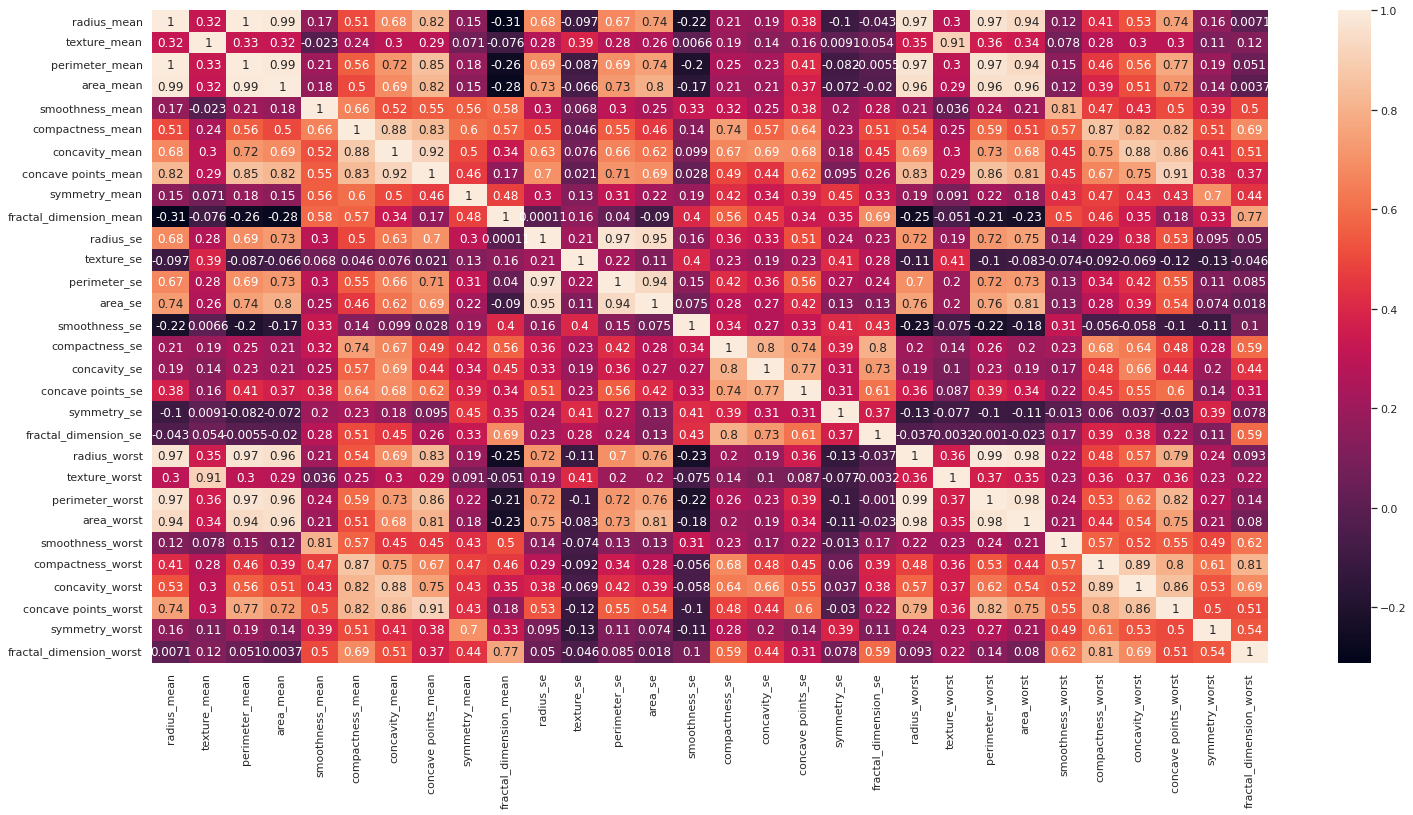

In [ ]:
# providing the heatmap for the variables to represent the corrolation between them.
sns.set(font_scale=1)
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), annot=True)

There are 31 variables with different range of correlations. We may keep the variables with higher rate of correlation. 

In [ ]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array([1, 0])

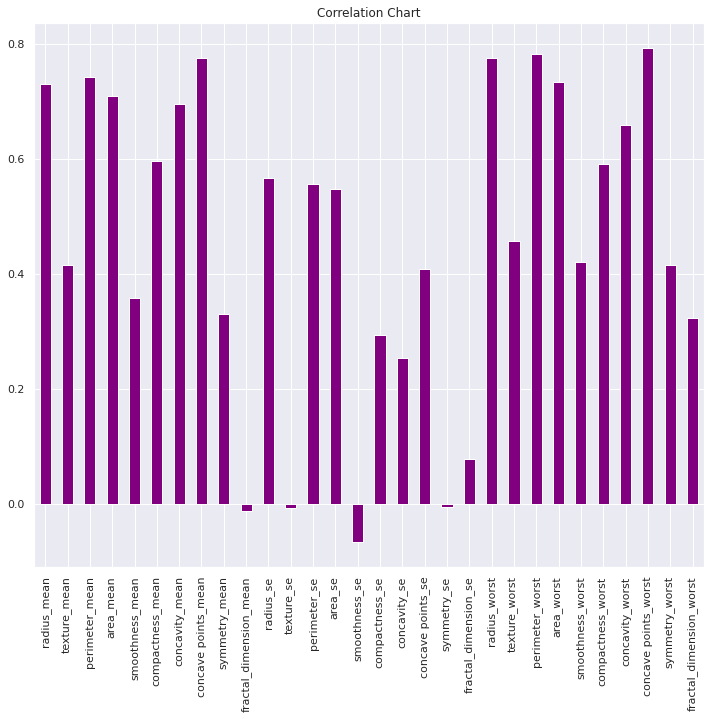

In [ ]:
df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation Chart",color="Purple");

Regarding the chart, we look for only the variables that have large correlation with factors. So, for the initial analysis the variables with higher than .35 will consider for the EDA. So, drop the following parameters:
'fractal_dimension_mean', 'texture_se','smoothness_se','compactness_se','concavity_se','symmetry_se','fractal_dimension_worst'


In [ ]:
df = df.drop(['fractal_dimension_mean','texture_se','smoothness_se','compactness_se','concavity_se','symmetry_se','fractal_dimension_worst'],axis = 1)

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

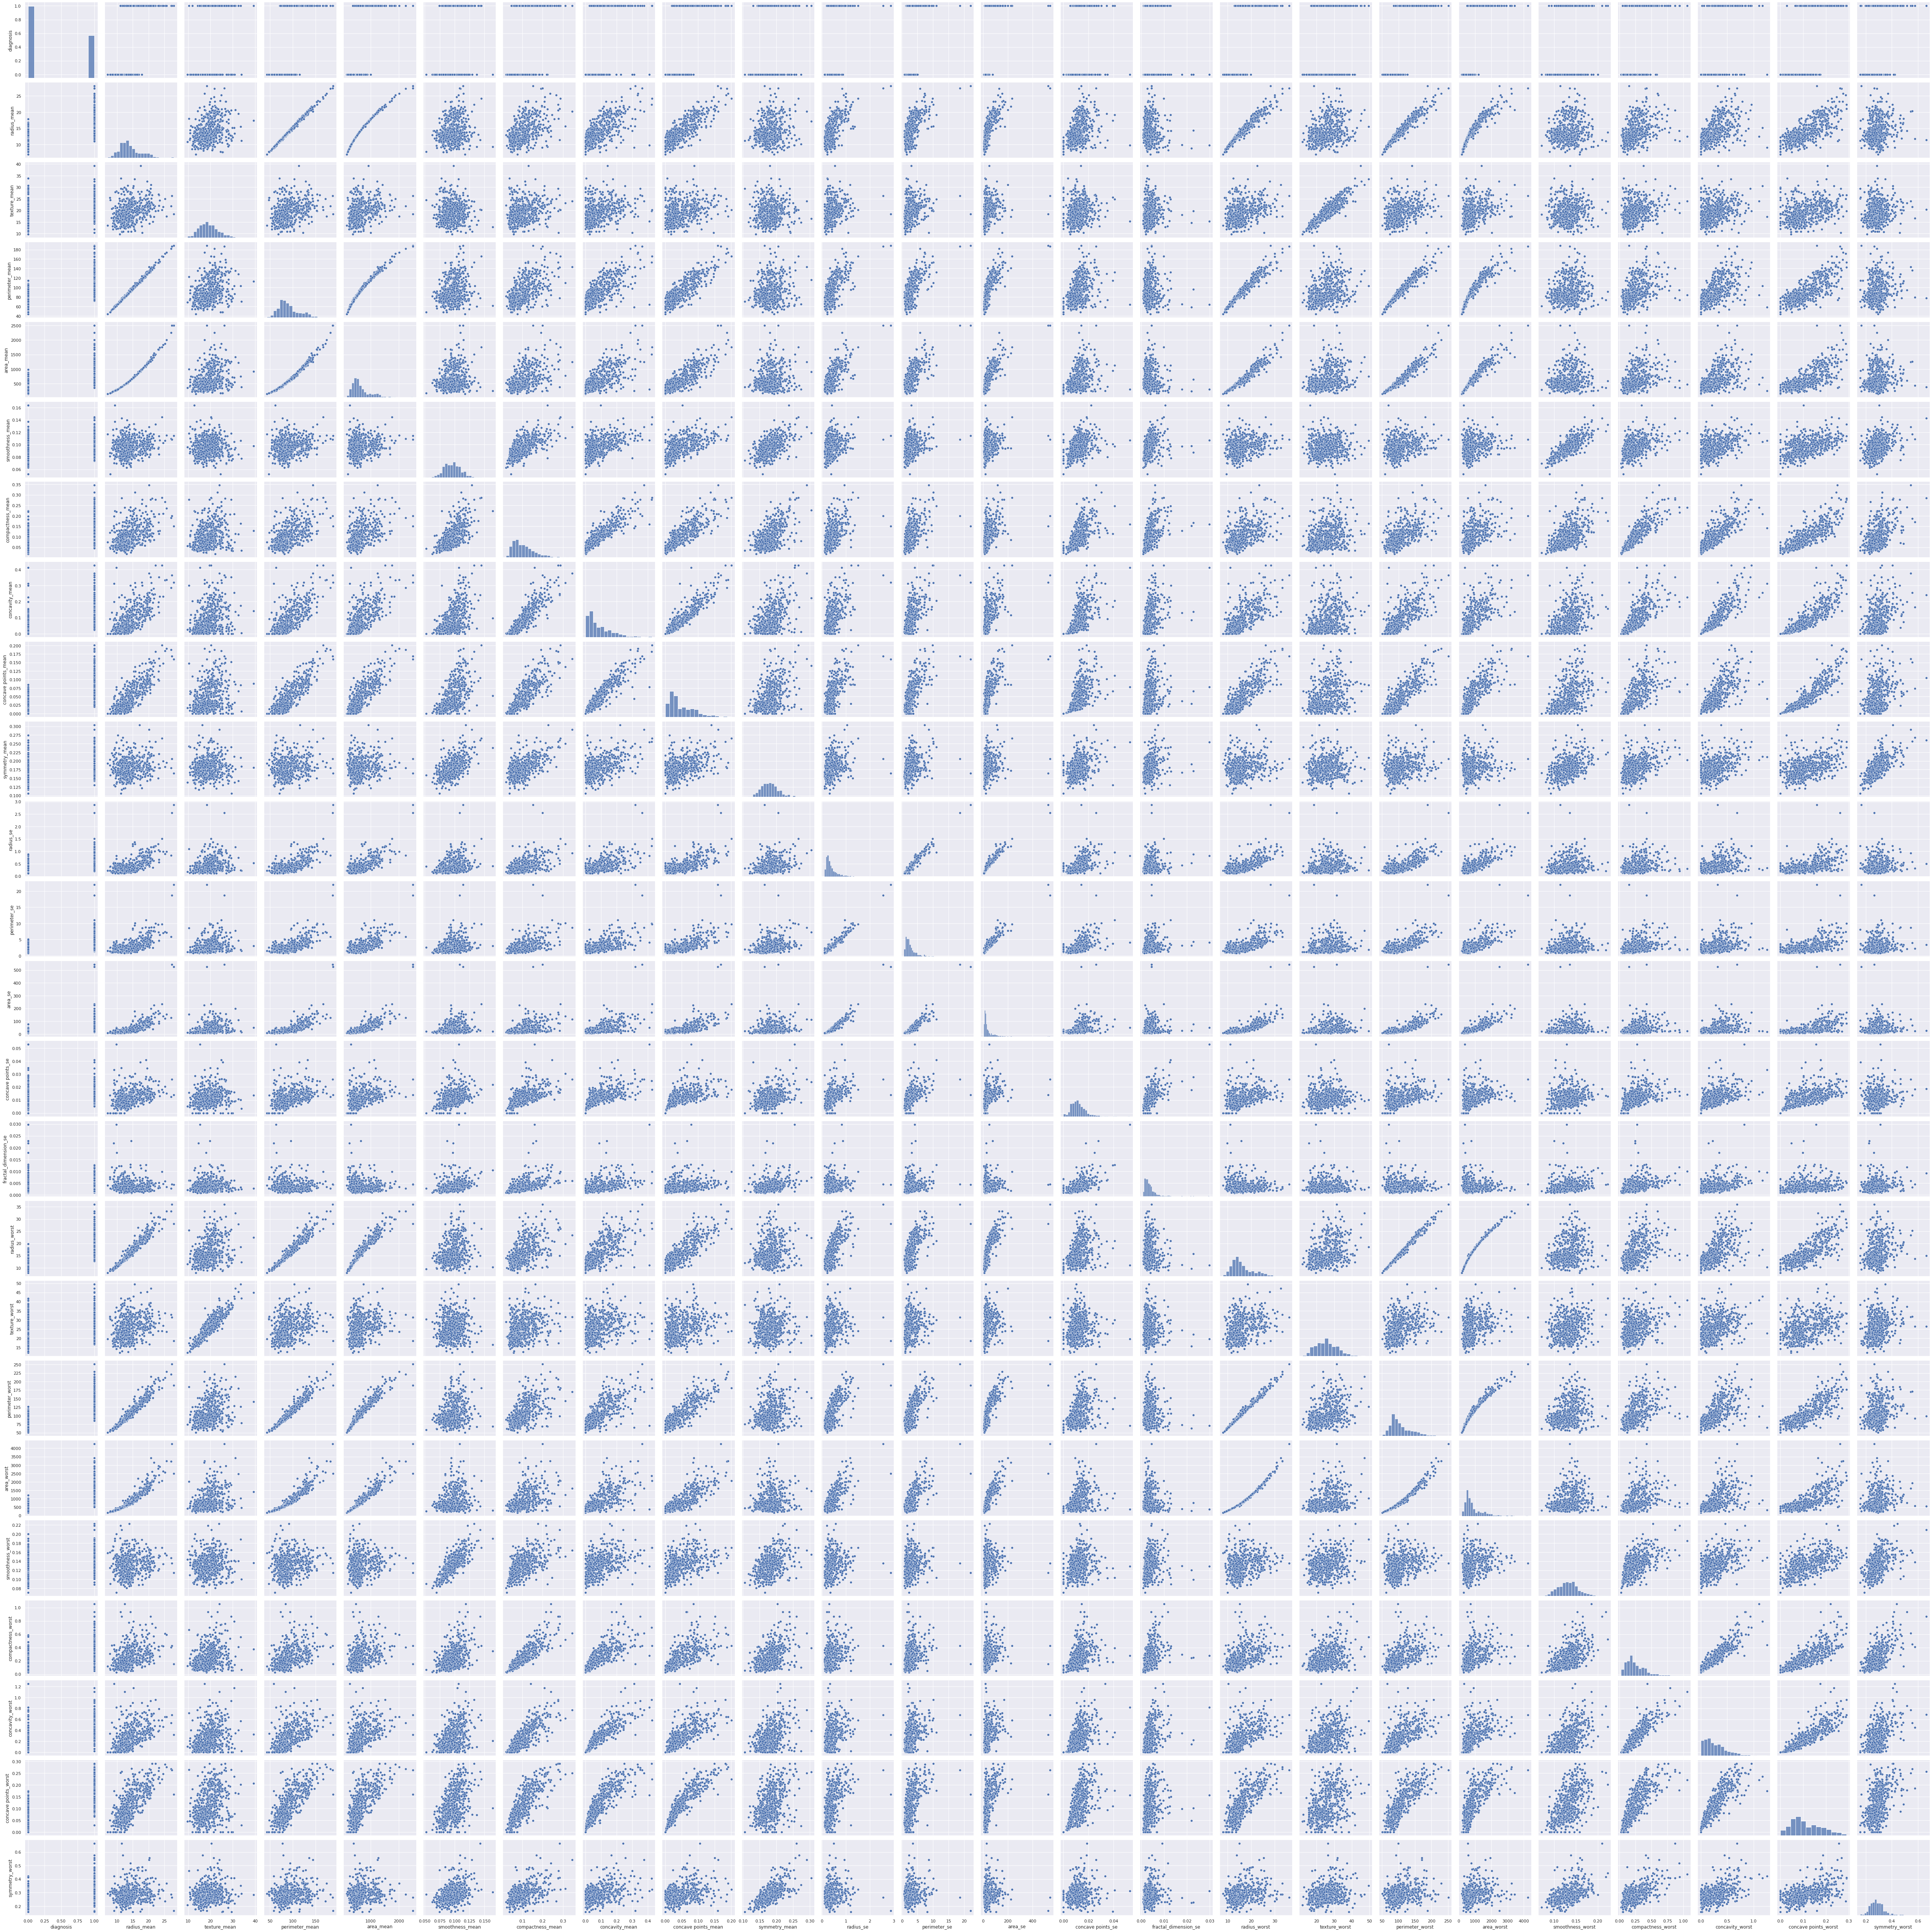

In [ ]:
# check for the any correlation
plt.figure(figsize=(15, 15))
sns.pairplot(df, height=3, diag_kind="hist")

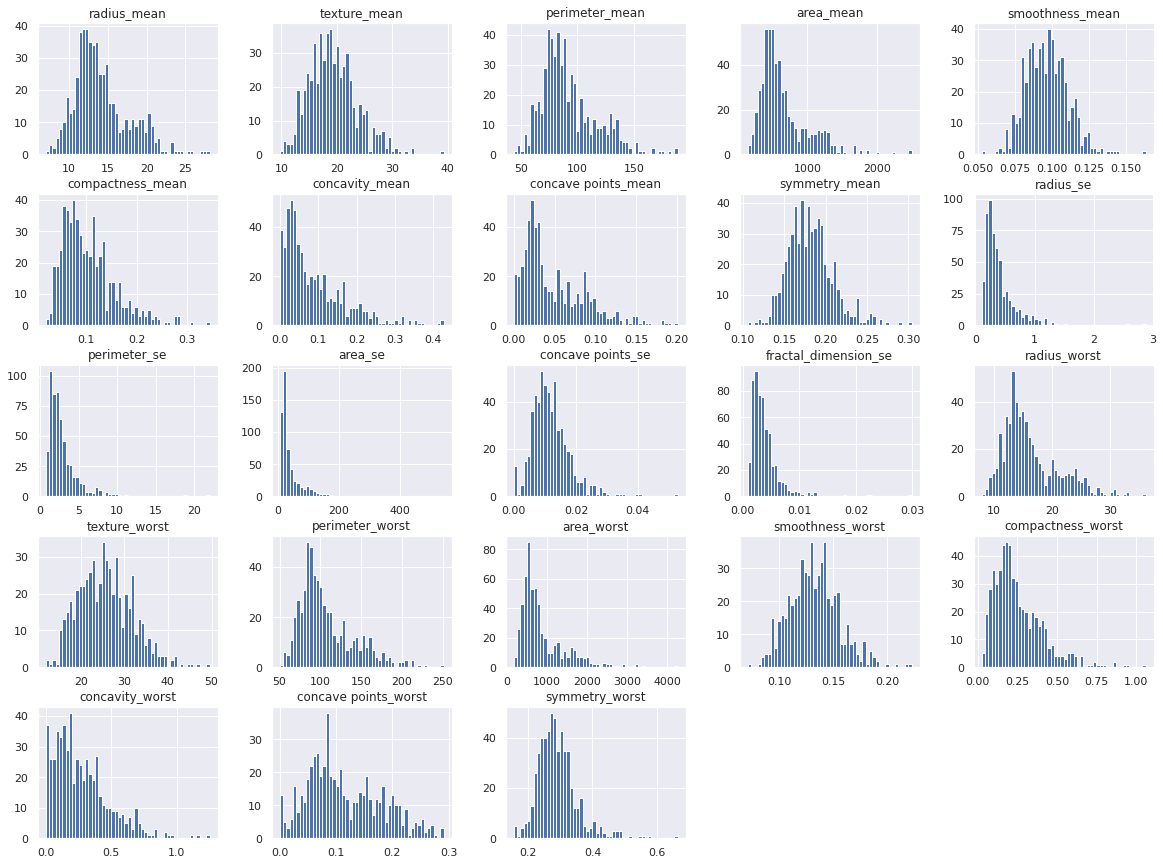

In [ ]:
# ditribution of numerical values
df1=df.drop(['diagnosis'],axis = 1)
%matplotlib inline
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15))
plt.show()

In this study we can compare the logistic regression, KNN,SVM and Random forest algorithms regarding the ability of classifing the tumors, and accuracy of each algorthm. We are going to use scikit-learn to conduct the machin learning analysis. 